# python - graphviz connection

In [1]:
!pip install graphviz

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## feature 사이에 상관도를 확인하는 방법
1. heatmap
2. pairplot
3. 상관계수, 상관테이블

In [5]:
import seaborn as sns

일반적으로는 pandas를 이용하여 dataframe을 가져온다.

In [6]:
iris_pd = sns.load_dataset('iris')
iris_pd

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


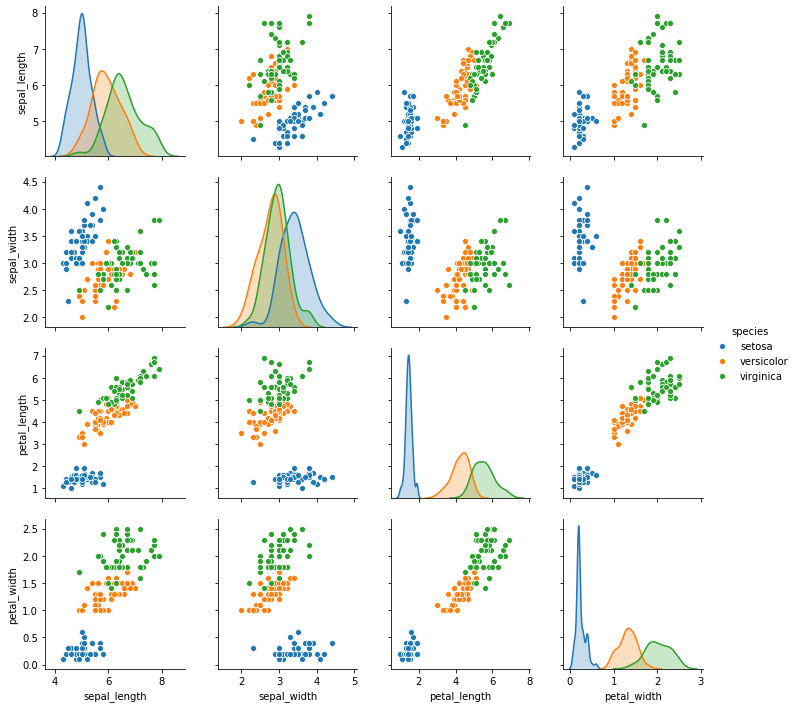

In [7]:
sns.pairplot(iris_pd, hue='species')

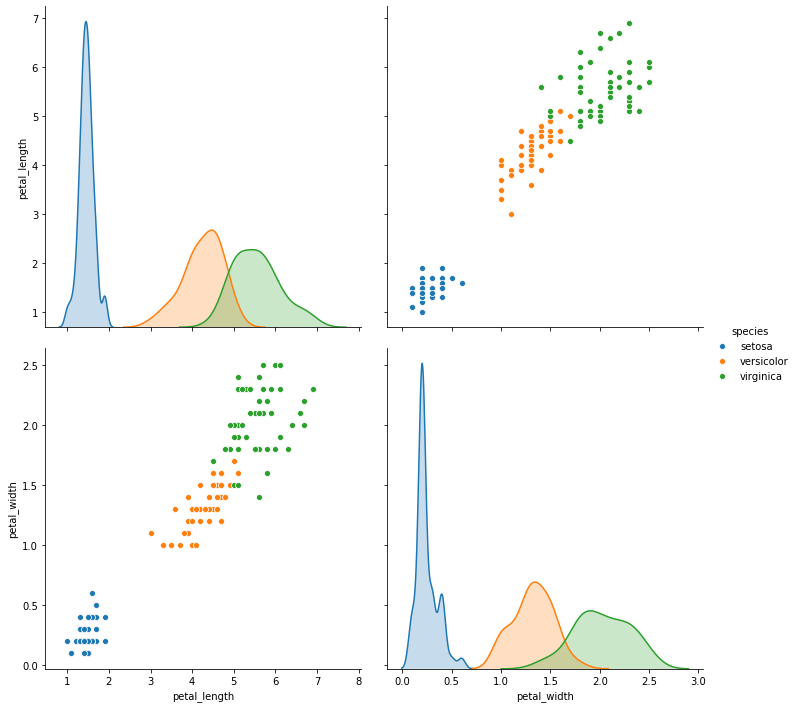

In [8]:
sns.pairplot(iris_pd, hue='species', vars=['petal_length','petal_width'], height=5)

In [9]:
data = iris.data[:,2:]
correct = iris.target

In [10]:
from sklearn.tree import DecisionTreeClassifier

↓ (hyper parameters)

In [20]:
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=10)  # random_state = seed

In [21]:
tree_clf.fit(data, correct)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [22]:
from sklearn.tree import export_graphviz

### 단어 오타 조심!

In [23]:
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=['petal_length','petal_width'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [24]:
import graphviz

In [25]:
with open('iris_tree.dot') as f:
    dot_graph = f.read()

In [26]:
dot = graphviz.Source(dot_graph)

In [27]:
dot.format = 'png'

In [28]:
dot.render(filename='iris_tree', directory='images/tree', cleanup=True)

'images/tree\\iris_tree.png'

# 예측

In [40]:
tree_clf.predict_proba([[4.75,1.8]])  # 가능성(probability) 예측(predict)

array([[0.        , 0.33333333, 0.66666667]])

가능성 예측의 답은 각 답이 나올 확률%

In [35]:
tree_clf.predict([[2.0,0.5]])

array([0])

예측의 답은 답안지의 index

In [ ]:
x_train